In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
BGR_image = cv2.imread("Side_3_None.jpg")
image = cv2.cvtColor(BGR_image, cv2.COLOR_BGR2RGB)

In [14]:
# define the lists of boundaries
red_boundaries = [([90, 0, 20], [200, 0, 45])]
green_boundaries = [([0, 70, 0], [0, 170, 0])]
blue_boundaries = [([0, 50, 155], [55, 120, 255])]

In [15]:
def color(image, boundaries):
    # loop over the boundaries
    for (lower, upper) in boundaries:
        # create NumPy arrays from the boundaries
        lower = np.array(lower, dtype = "uint8")
        upper = np.array(upper, dtype = "uint8")

        # find the colors within the specified boundaries and apply
        # the mask
        mask = cv2.inRange(image, lower, upper)
        output = cv2.bitwise_and(image, image, mask = mask)
        
    return output

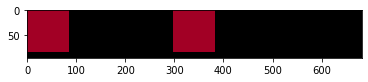

In [16]:
red_im = color(image,red_boundaries)
# convert image to grayscale image
gray_red = cv2.cvtColor(red_im, cv2.COLOR_RGB2GRAY)
plt.imshow(red_im)

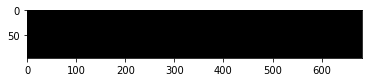

In [17]:
blue_im = color(image,blue_boundaries)
gray_blue = cv2.cvtColor(blue_im, cv2.COLOR_RGB2GRAY)
plt.imshow(blue_im)

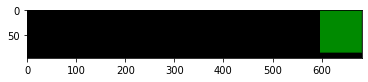

In [18]:
green_im = color(image,green_boundaries)
gray_green = cv2.cvtColor(green_im, cv2.COLOR_RGB2GRAY)
plt.imshow(green_im)

In [19]:
def blob(gray_image):
    # convert the grayscale image to binary image
    ret,thresh = cv2.threshold(gray_image,10,255,0)
 
    # find contours in the binary image
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        # calculate moments for each contour
        M = cv2.moments(c)

        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        print("X: ", cX ,"Y:", cY)

In [20]:
blob(gray_red)

X:  339 Y: 42
X:  42 Y: 42


In [21]:
blob(gray_blue)

In [22]:
blob(gray_green)

X:  638 Y: 42
